In [5]:
import pandas as pd

df = pd.read_csv("/content/laptop_price - dataset.csv")
df.head()


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [7]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [8]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [10]:
# cleans
df.duplicated().sum()

0

In [11]:
df.shape[0]

1275

In [16]:
print(df.shape[0])
df.drop_duplicates(inplace=True)
print(df.shape[0])

1275
1275


In [17]:
df.isna().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


In [21]:
# Fill missing values with zero
df = df.fillna(0)
print(df.isna().sum())

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64


Saving laptop_price - dataset.csv to laptop_price - dataset (1).csv


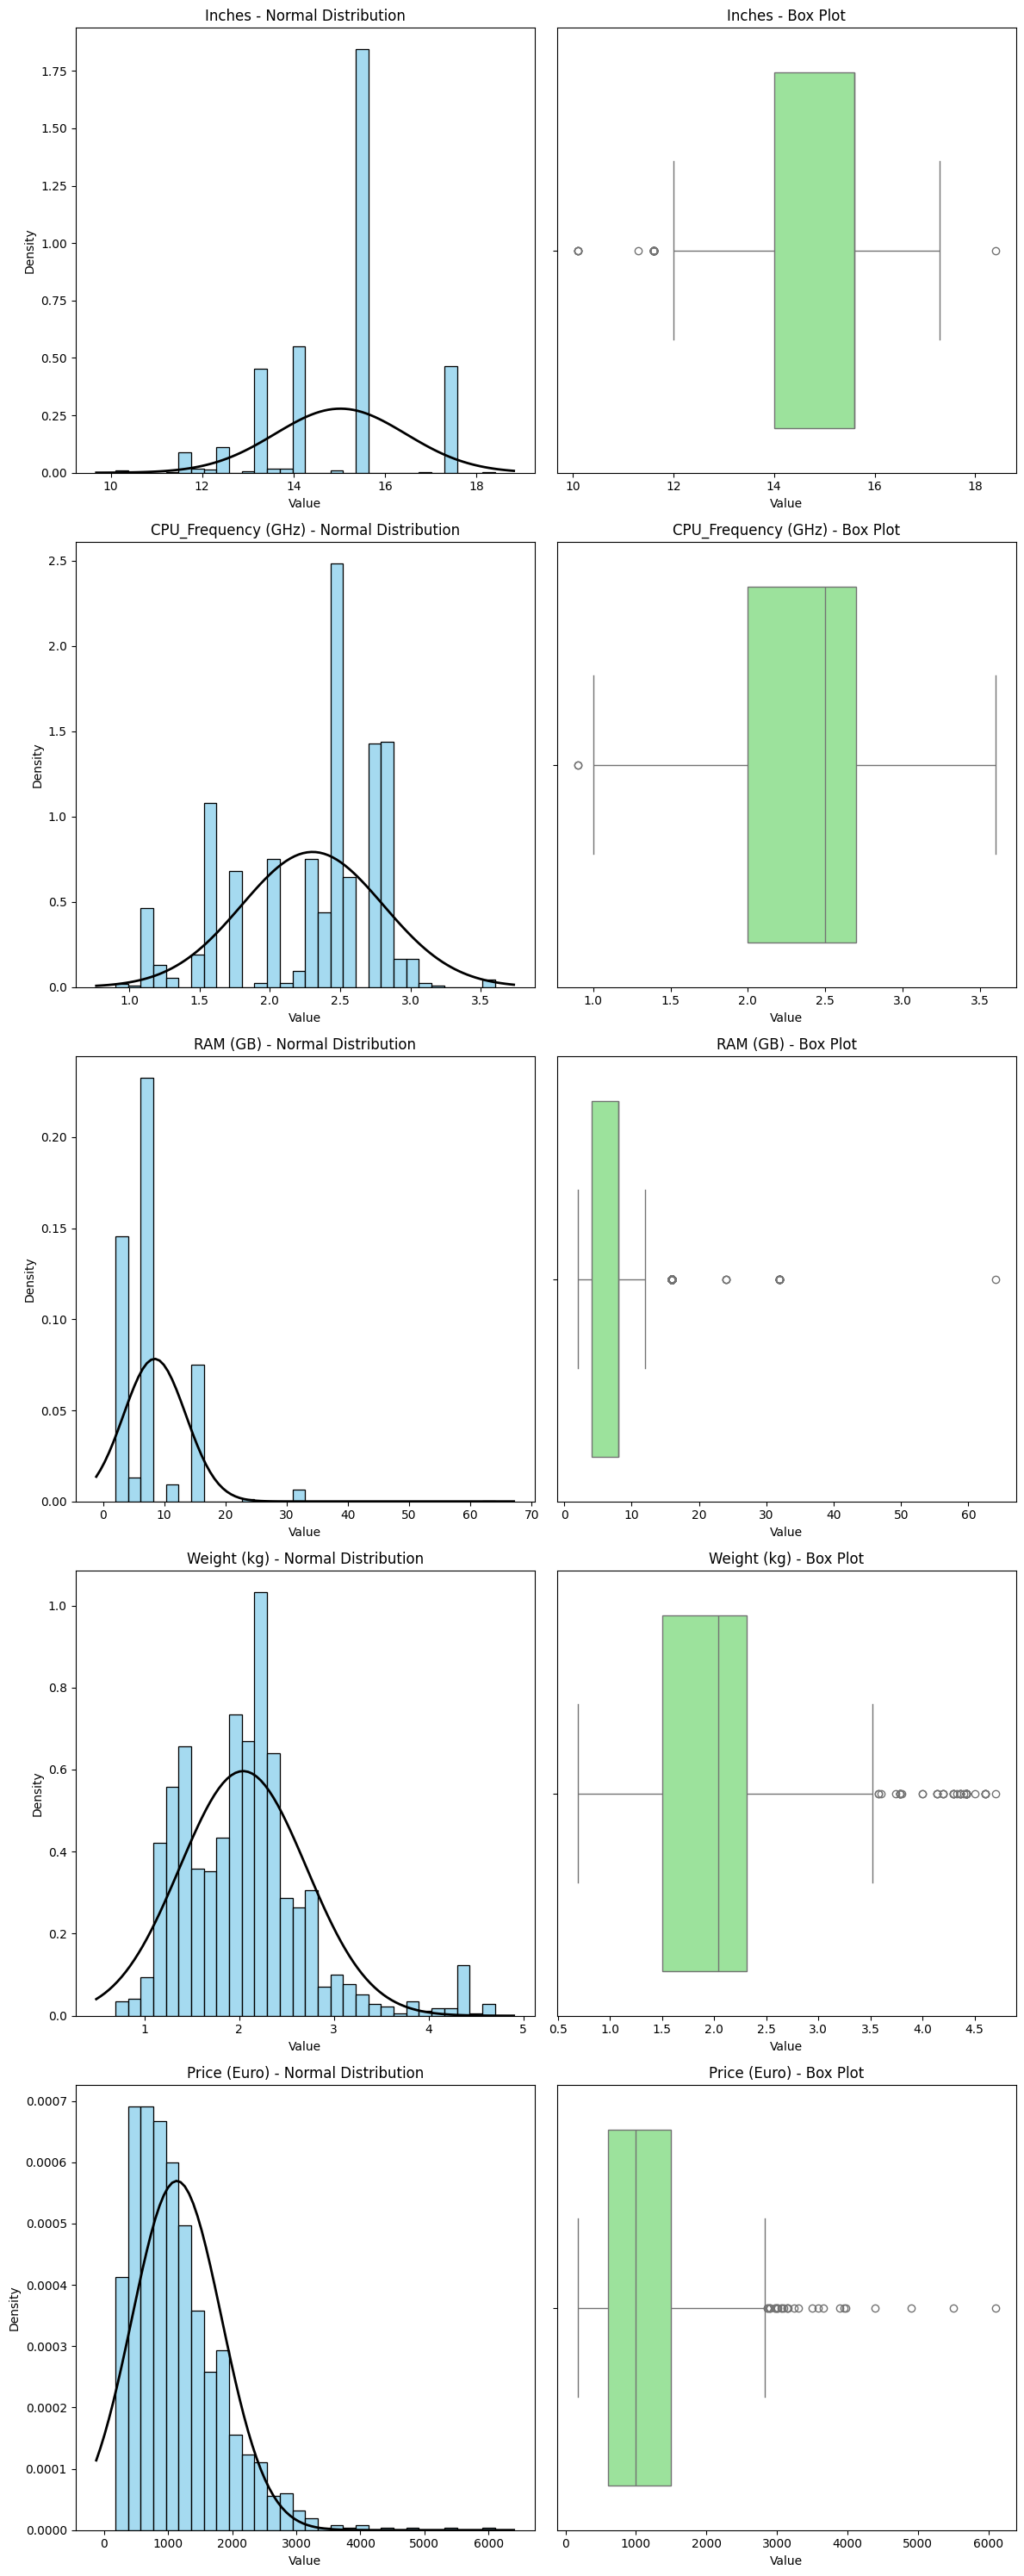

In [27]:
!pip install seaborn

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from google.colab import files
uploaded = files.upload()

file_name = "laptop_price - dataset.csv"
df = pd.read_csv(file_name)

df_num = df.select_dtypes(include=np.number)

num_columns = len(df_num.columns)

fig, axes = plt.subplots(num_columns, 2, figsize=(12, 6 * num_columns))

for i, column in enumerate(df_num.columns):
    data = df_num[column].dropna()

    ax1 = axes[i, 0]
    sns.histplot(data, kde=False, bins=30, color='skyblue', ax=ax1, stat="density")

    mu, std = stats.norm.fit(data)
    xmin, xmax = ax1.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    ax1.plot(x, p, 'k', linewidth=2)
    ax1.set_title(f'{column} - Normal Distribution')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Density')

    ax2 = axes[i, 1]
    sns.boxplot(x=data, color='lightgreen', ax=ax2)
    ax2.set_title(f'{column} - Box Plot')
    ax2.set_xlabel('Value')

plt.tight_layout()
plt.show()

In [28]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

<ipython-input-33-d0e8d2bea669>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cat, x=column, palette='Set2')


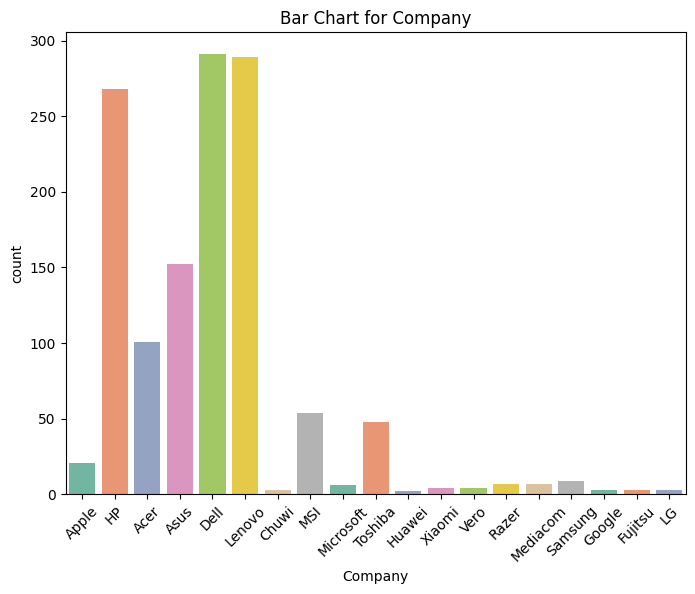

<ipython-input-33-d0e8d2bea669>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cat, x=column, palette='Set2')


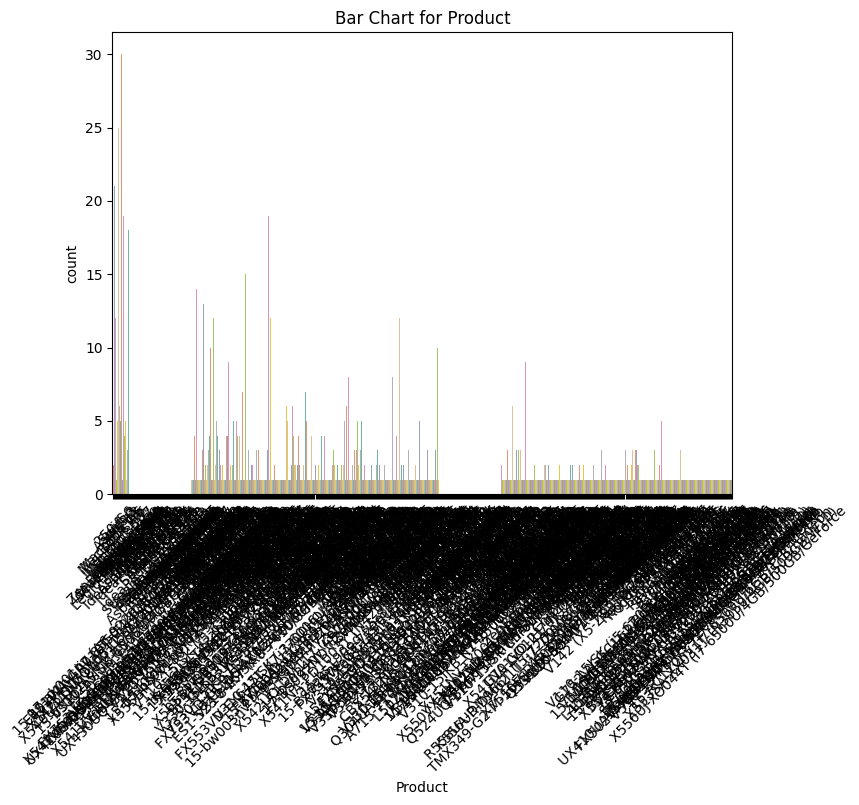

<ipython-input-33-d0e8d2bea669>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cat, x=column, palette='Set2')


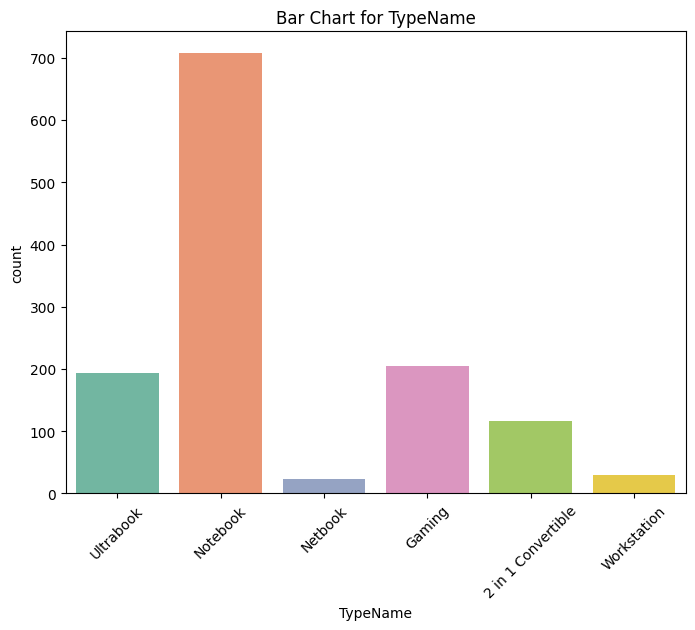

<ipython-input-33-d0e8d2bea669>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cat, x=column, palette='Set2')


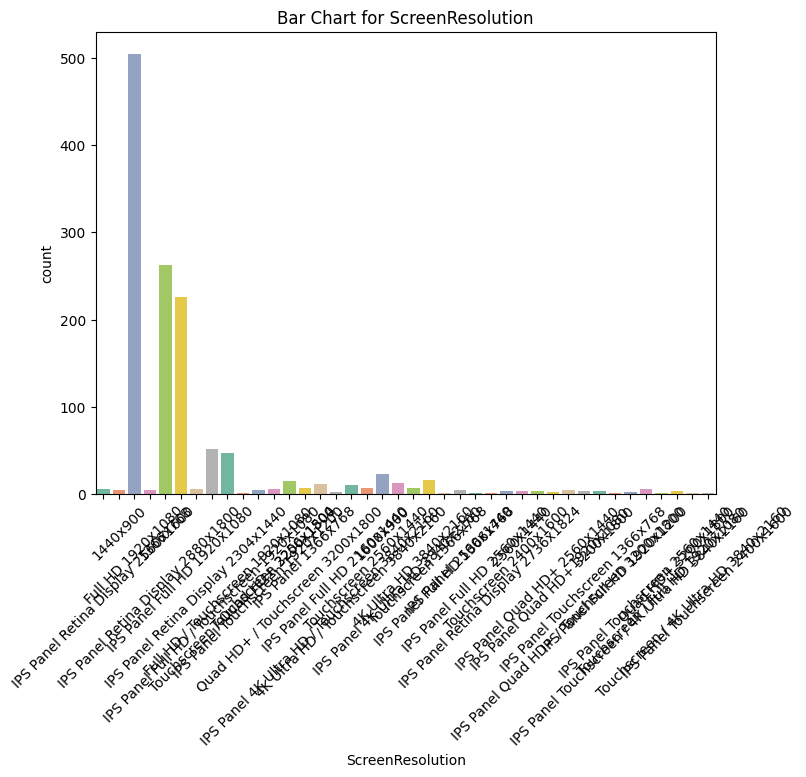

<ipython-input-33-d0e8d2bea669>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cat, x=column, palette='Set2')


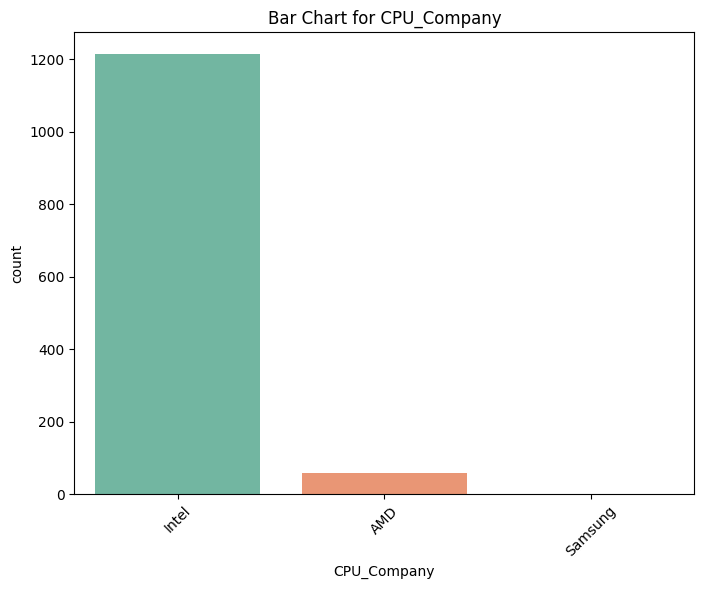

<ipython-input-33-d0e8d2bea669>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cat, x=column, palette='Set2')


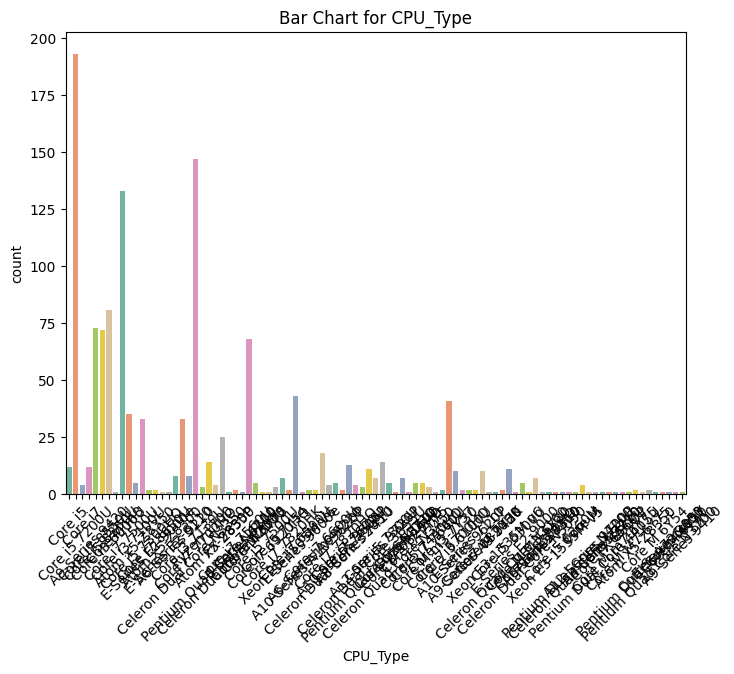

<ipython-input-33-d0e8d2bea669>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cat, x=column, palette='Set2')


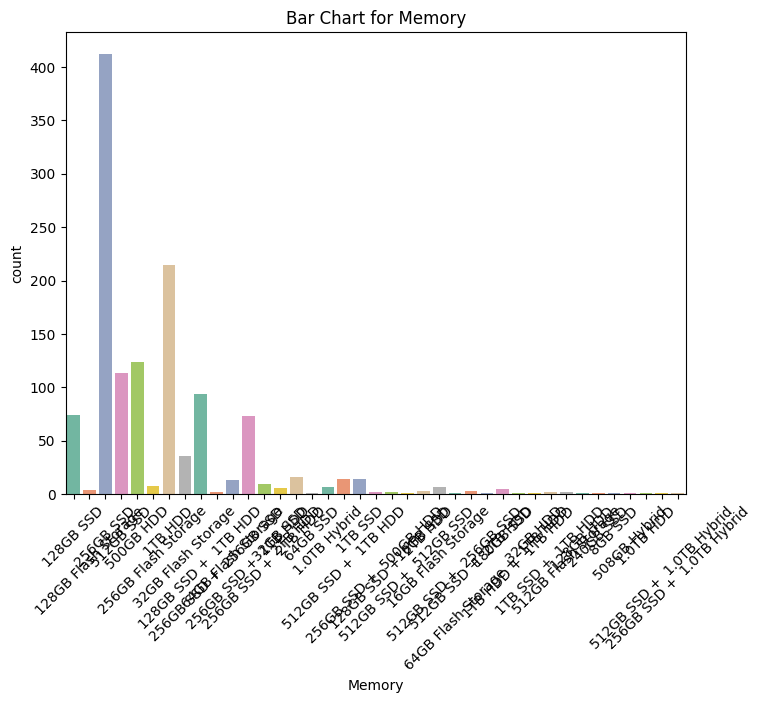

<ipython-input-33-d0e8d2bea669>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cat, x=column, palette='Set2')


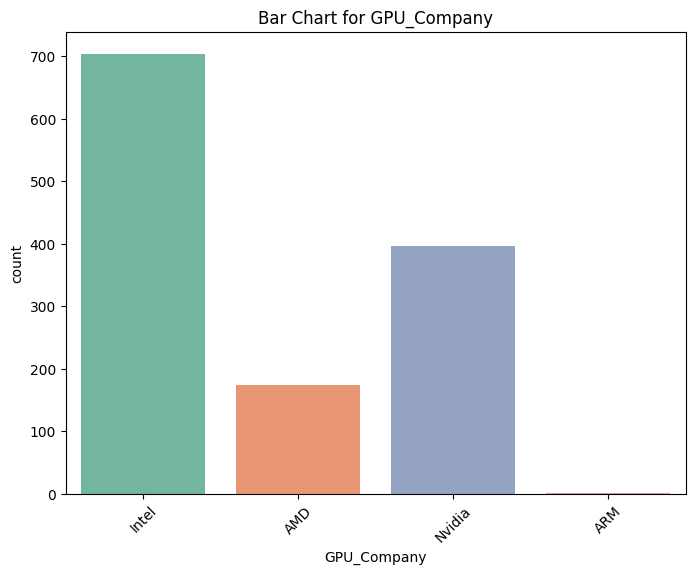

<ipython-input-33-d0e8d2bea669>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cat, x=column, palette='Set2')


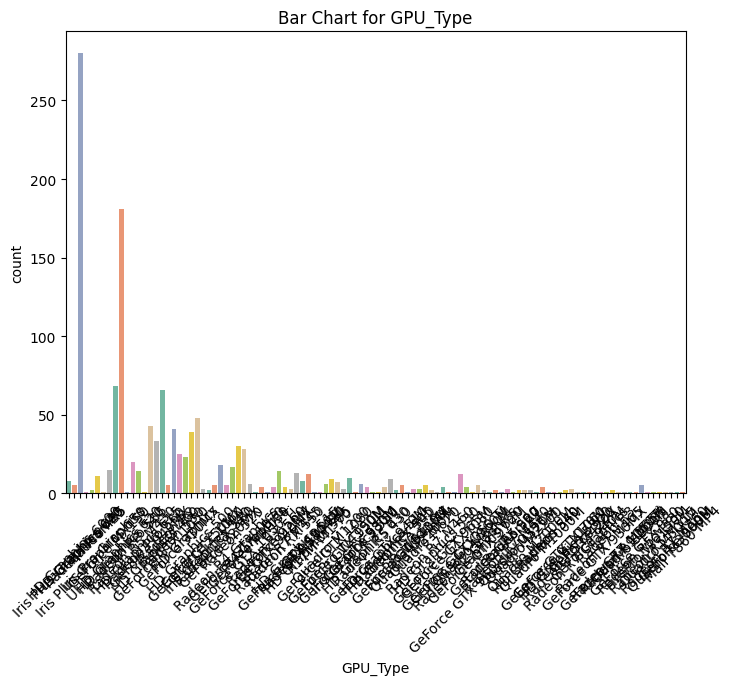

<ipython-input-33-d0e8d2bea669>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cat, x=column, palette='Set2')


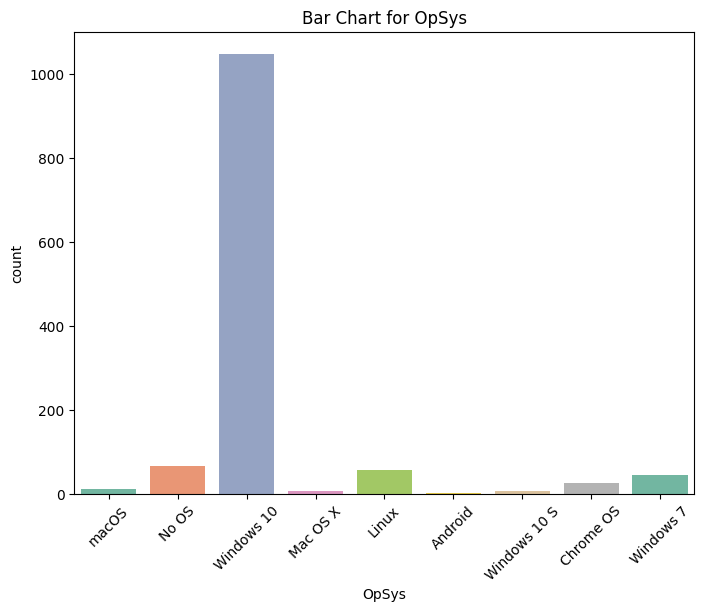

In [33]:
df_cat = df.select_dtypes(include=['object'])

for column in df_cat.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_cat, x=column, palette='Set2')
    plt.title(f'Bar Chart for {column}')
    plt.xticks(rotation=45)
    plt.show()


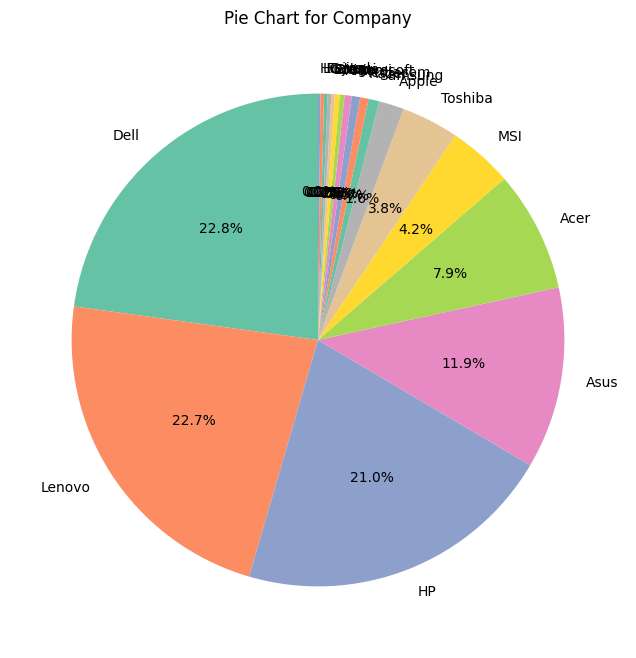

In [34]:
df_cat = df.select_dtypes(include=['object'])

column_to_plot = 'Company'
plt.figure(figsize=(8, 6))
df_cat[column_to_plot].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2', len(df_cat[column_to_plot].unique())),
    startangle=90,
    figsize=(8, 8)
)
plt.title(f'Pie Chart for {column_to_plot}')
plt.ylabel('')
plt.show()
